In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import datetime as dt
import time as t

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/Colaboratory/Walmart Sales Forecasting/train.csv')
df_stores = pd.read_csv('/content/drive/MyDrive/Colaboratory/Walmart Sales Forecasting/stores.csv')
df_features = pd.read_csv('/content/drive/MyDrive/Colaboratory/Walmart Sales Forecasting/features.csv')

print('TRAIN:\n', df_train.head())
print('\nSTORES:\n', df_stores.head())
print('\nFEATURES:\n', df_features.head())

TRAIN:
    Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

STORES:
    Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

FEATURES:
    Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN  

In [3]:
df = df_train.merge(df_features, on =['Store', 'Date'], how = 'left').merge(df_stores, on = ['Store'], how = 'left')



df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [4]:
df = df.drop(columns = 'IsHoliday_y', axis = 1)
df = df.rename({'IsHoliday_x' : 'IsHoliday'}, axis = 1)

In [5]:
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221


In [6]:
df.head(100000)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11,17,2010-04-23,13984.63,False,68.37,2.795,NaN,NaN,NaN,NaN,NaN,213.722185,7.343,A,207499
99996,11,17,2010-04-30,10486.69,False,71.13,2.780,NaN,NaN,NaN,NaN,NaN,213.671682,7.343,A,207499
99997,11,17,2010-05-07,12840.19,False,75.57,2.835,NaN,NaN,NaN,NaN,NaN,213.621178,7.343,A,207499
99998,11,17,2010-05-14,11494.95,False,77.64,2.854,NaN,NaN,NaN,NaN,NaN,213.619614,7.343,A,207499


In [ ]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [ ]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [ ]:
mark_down = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

for col in mark_down:
  df[mark_down] = df[mark_down].fillna(df[mark_down].mean())



In [ ]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

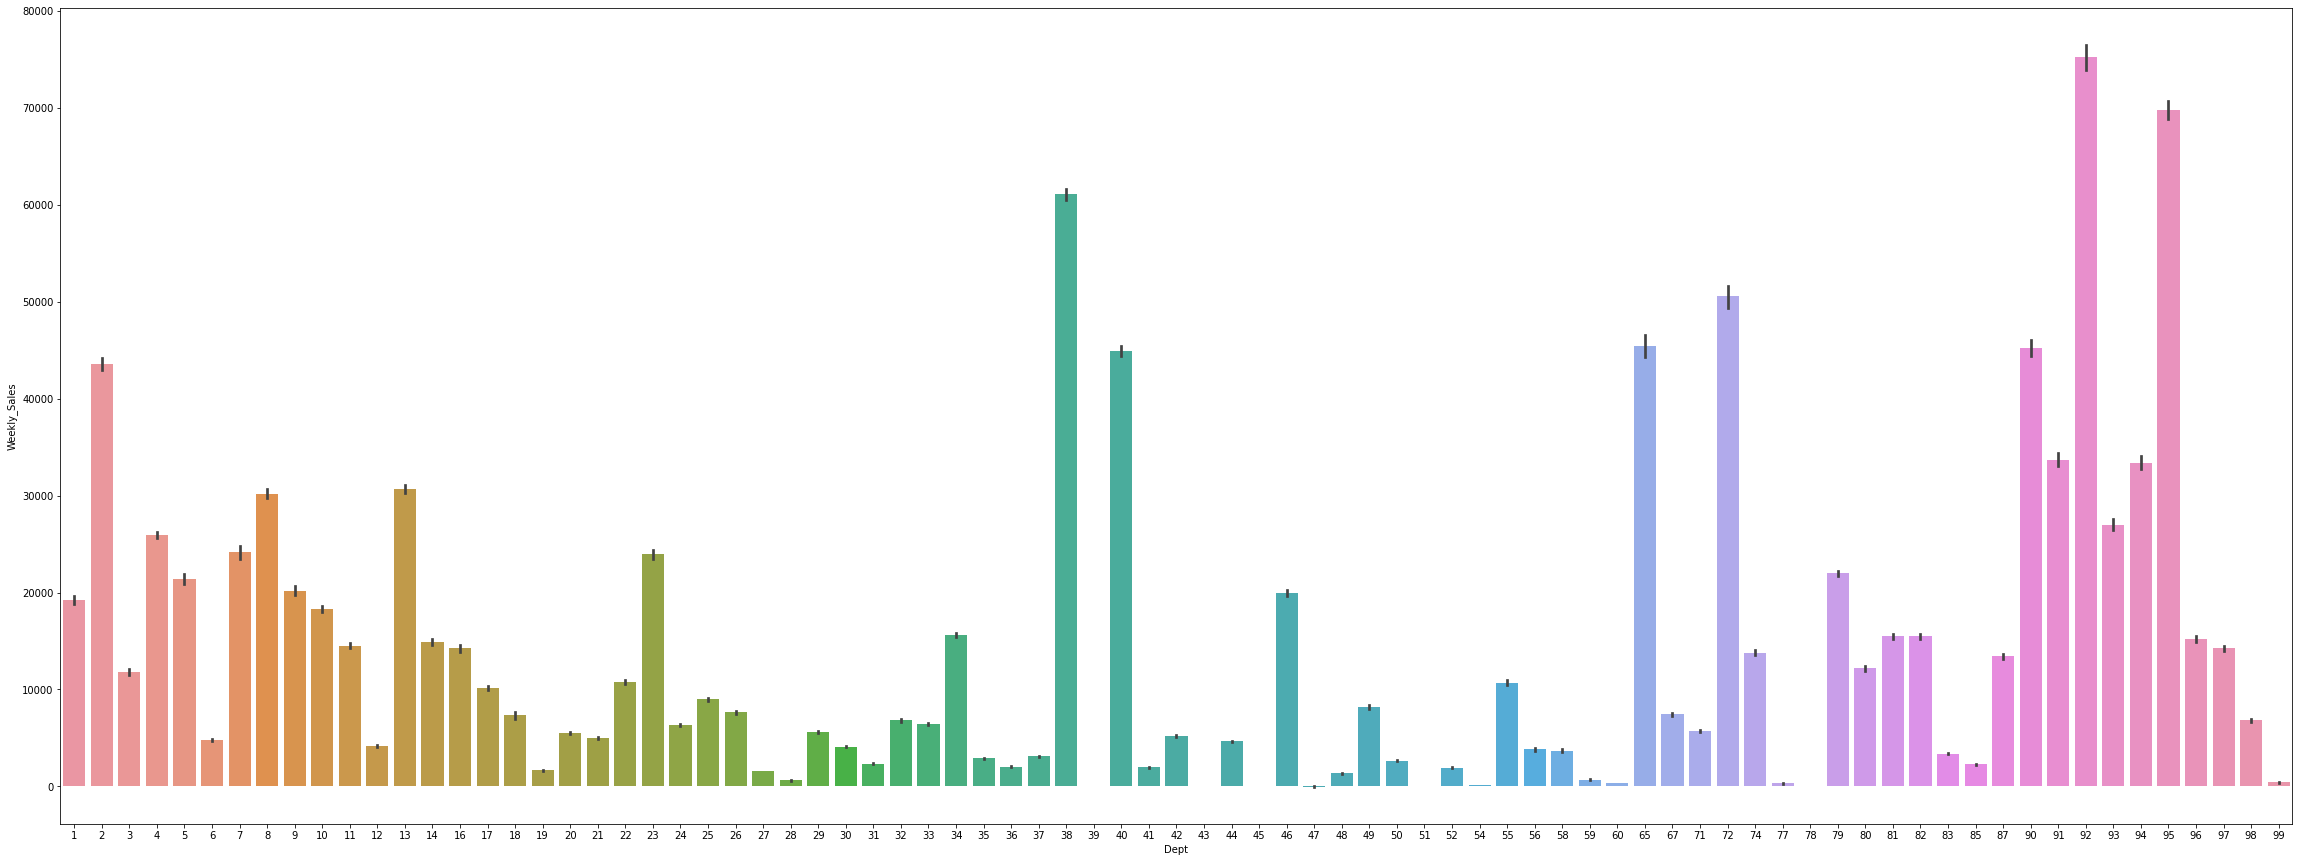

In [ ]:
plt.figure(figsize = (40, 15))
sns.barplot(data = df, x = 'Dept', y = 'Weekly_Sales')

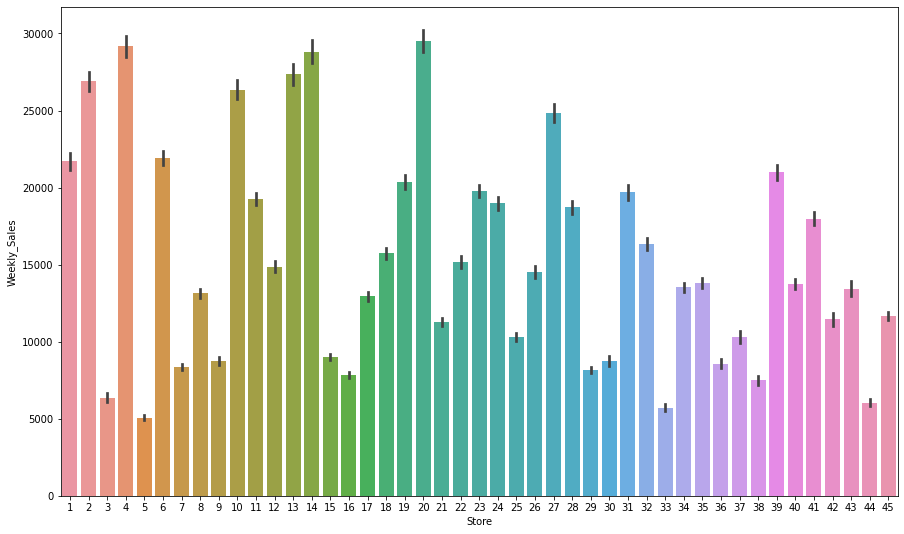

In [ ]:
plt.figure(figsize = (15, 9))
sns.barplot(data = df, x ='Store', y = 'Weekly_Sales')

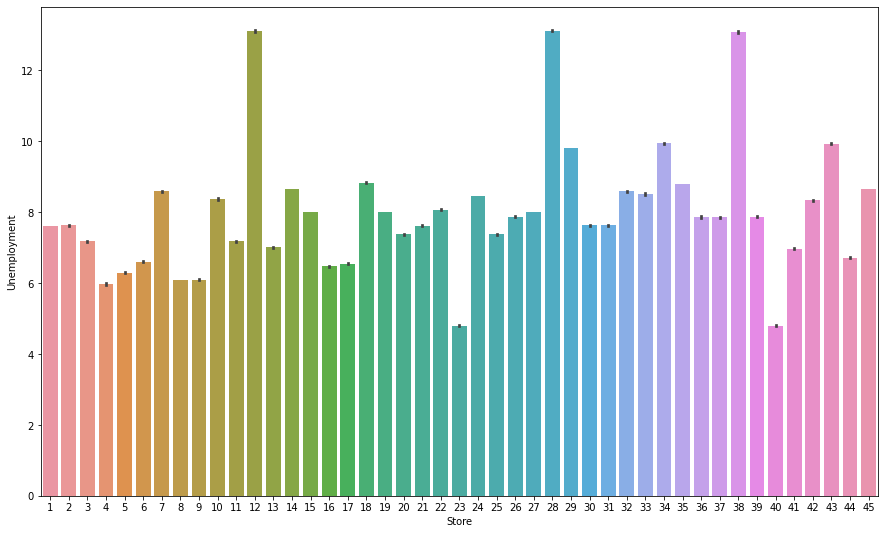

In [ ]:
plt.figure(figsize = (15, 9))
sns.barplot(data = df, x ='Store', y = 'Unemployment')

In [ ]:
# plt.figure(figsize = (15, 9))
# sns.barplot(data = df, x ='Weekly_Sales', y = 'Size')
# plt.show()

<Figure size 1080x648 with 0 Axes>

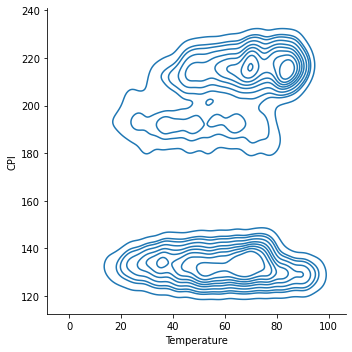

In [ ]:
plt.figure(figsize = (15, 9))
sns.displot(data = df, x = 'Temperature', y = 'CPI', kind = 'kde')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['week'] = df['Date'].dt.week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

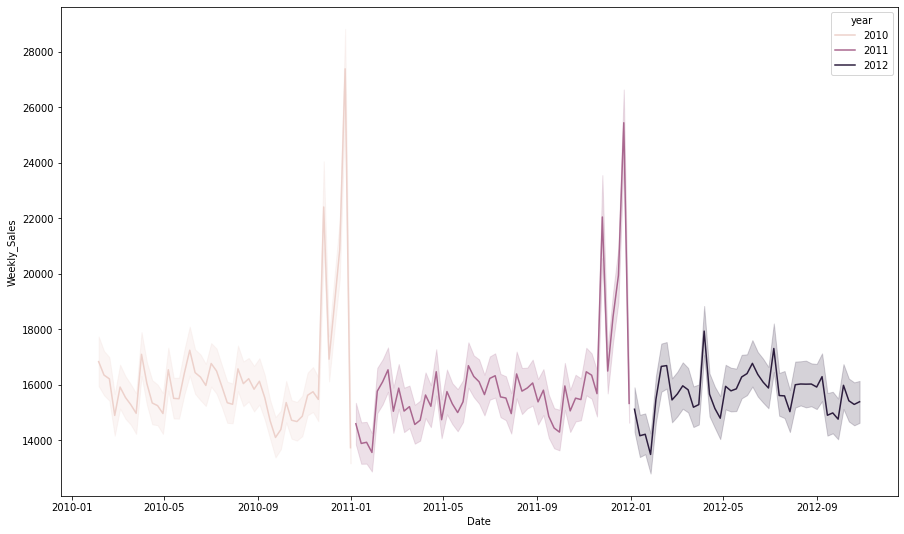

In [ ]:
plt.figure(figsize = (15, 9))
sns.lineplot(data = df, x = 'Date', y = 'Weekly_Sales', hue = 'year')

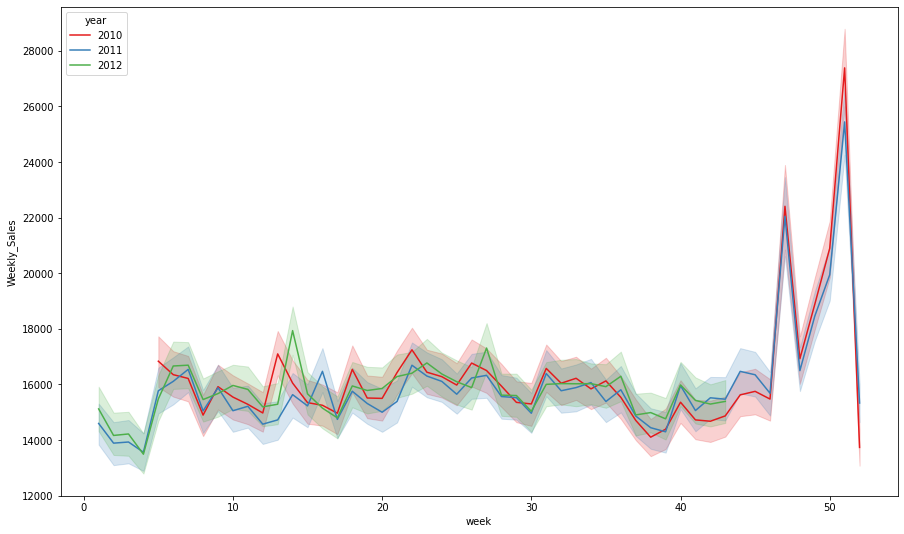

In [ ]:
plt.figure(figsize = (15, 9))
sns.lineplot(data = df, x = 'week', y = 'Weekly_Sales', hue = 'year', palette = 'Set1')

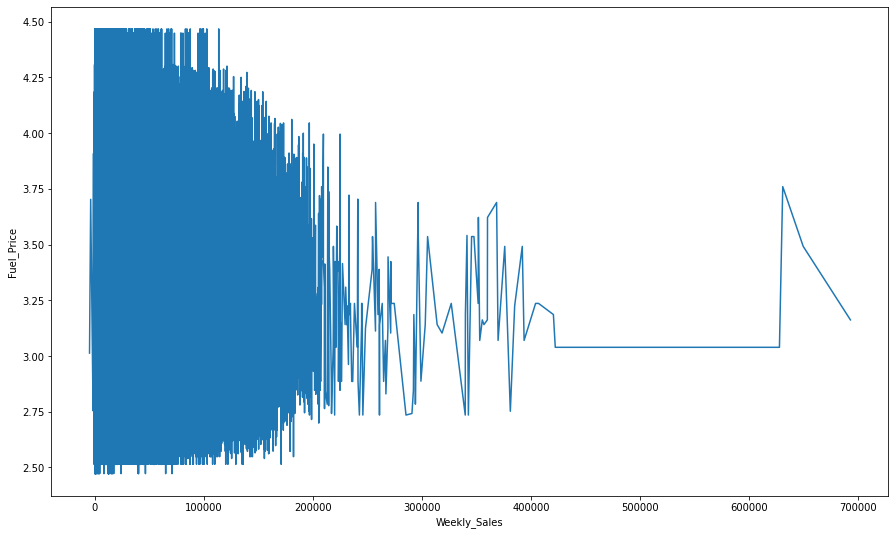

In [ ]:
plt.figure(figsize = (15, 9))
sns.lineplot(data = df, x = 'Weekly_Sales', y = 'Fuel_Price')

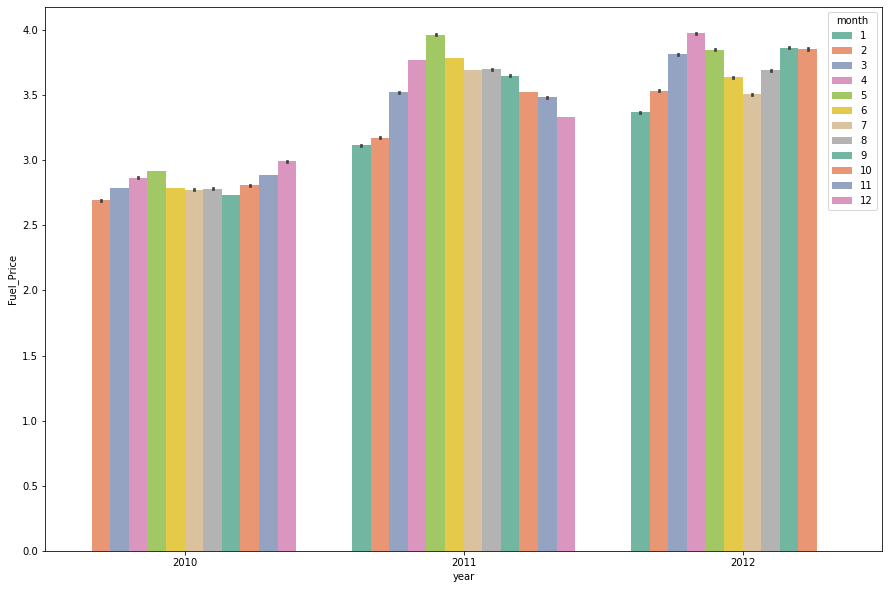

In [ ]:
plt.figure(figsize = (15, 10))
sns.barplot(data = df, x= 'year', y = 'Fuel_Price', hue = 'month', palette = 'Set2')

In [ ]:
# range data nya beda, ini pake iqr?

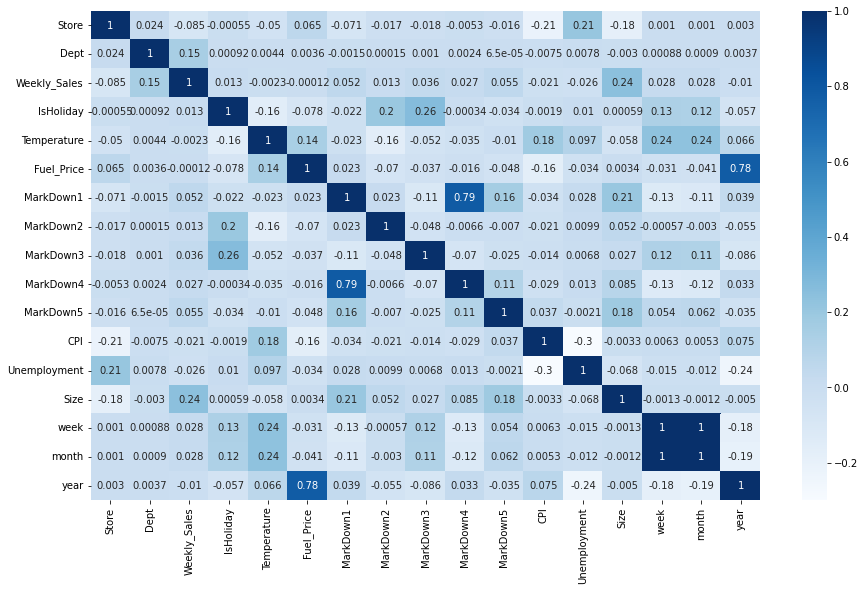

In [ ]:
plt.figure(figsize = (15, 9))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

In [ ]:
df.dtypes()

In [ ]:
le = LabelEncoder()
df['IsHoliday'] = le.fit_transform(df['IsHoliday'])
df['Type'] = le.fit_transform(df['Type'])

In [ ]:
X = df.drop(columns = ['Date', 'MarkDown1'], axis = 1)
y = df['MarkDown1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

In [ ]:
min_max_scale = MinMaxScaler()

X_train_scale = min_max_scale.fit_transform(X_train)
y_train_scale = min_max_scale.fit_transform(y_train)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

model = {}
y_pred = {}

model['LinReg'] = LinearRegression()
model['Lasso'] = Lasso()
model['RandomForest'] = RandomForestRegressor()
model['GBRegressor'] = GradientBoostingRegressor()
model['SVR'] = SVR()
model['KNRegressor'] = KNeighborsRegressor()

for m in model:
  model[m].fit(X_train_scale, y_train_scale)
  y_pred[m] = model[m].predict(X_test)

for model in y_pred:
  r2[model] = r2_score(y_test, y_pred[model])
  mae[model] = mean_absolute_error(y_test, y_pred[model])
  mse[model] = mean_squared_error(y_test, y_pred[model])

  print('\n{}'.format(model), r2[model])
  print('\n{}'.format(model), mae[model])
  print('\n{}'.format(model), mse[model])